In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
np.random.seed(17)

In [5]:
X_train = np.load('X_train_bi.npy')
y_train = np.load('y_train.npy')
(X_train.shape,X_train.dtype),(y_train.shape,y_train.dtype)

(((17412, 128, 128, 1), dtype('uint8')), ((17412, 2), dtype('float32')))

In [38]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.optimizers import Adam,RMSprop

In [39]:
 optimizer =Adam(lr =8e-5) 

In [41]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=36,
                 kernel_size=(6,6),
                 padding='same',
                 strides=2,
                 input_shape=(128,128,1), 
                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(4, 4)))

model.add(tf.keras.layers.Conv2D(filters=48,
                 kernel_size=(6,6),
                 padding='same',
                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2,activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 36)        1332      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 36)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 48)          62256     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 48)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 768)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [42]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) #

In [43]:
train_history = model.fit(X_train,y_train,batch_size=8,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/13
1742/1742 [==============================] - 6s 3ms/step - loss: 0.5526 - accuracy: 0.7458 - val_loss: 0.3113 - val_accuracy: 0.8852
Epoch 2/13
1742/1742 [==============================] - 6s 3ms/step - loss: 0.3574 - accuracy: 0.8597 - val_loss: 0.2824 - val_accuracy: 0.8932
Epoch 3/13
1742/1742 [==============================] - 6s 3ms/step - loss: 0.3162 - accuracy: 0.8796 - val_loss: 0.2716 - val_accuracy: 0.8989
Epoch 4/13
1742/1742 [==============================] - 6s 3ms/step - loss: 0.3014 - accuracy: 0.8868 - val_loss: 0.2607 - val_accuracy: 0.9027
Epoch 5/13
1742/1742 [==============================] - 6s 3ms/step - loss: 0.2874 - accuracy: 0.8937 - val_loss: 0.2527 - val_accuracy: 0.9098
Epoch 6/13
1742/1742 [==============================] - 6s 3ms/step - loss: 0.2652 - accuracy: 0.9024 - val_loss: 0.2412 - val_accuracy: 0.9136
Epoch 7/13
1742/1742 [==============================] - 6s 3ms/step - loss: 0.2680 - accuracy: 0.9022 - val_loss: 0.2346 - val_accuracy:

In [44]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy/loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

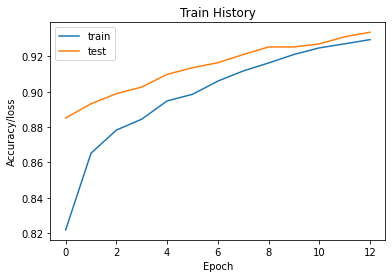

In [45]:
show_train_history('accuracy','val_accuracy')

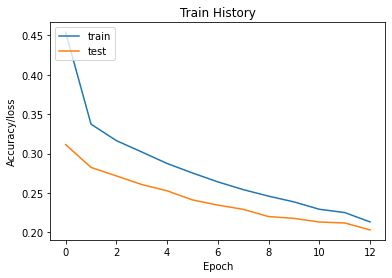

In [46]:
show_train_history('loss','val_loss')

In [47]:
X_test = np.load('X_test_bi.npy')
y_test = np.load('y_test.npy')
(X_test.shape,X_test.dtype),(y_test.shape,y_test.dtype)

(((4353, 128, 128, 1), dtype('uint8')), ((4353, 2), dtype('float32')))

In [48]:
eva = model.evaluate(X_test,y_test)
print('loss: ',eva[0],'accuracy: ',eva[1])

137/137 [==============================] - 0s 3ms/step - loss: 0.2149 - accuracy: 0.9336
loss:  0.21487368643283844 accuracy:  0.9336090087890625


In [32]:
model.save('malaria_BW.h5')